Excercise Sheet 5
================

Excercise 1: Generation of Poisson spike trains
----------------------------------------------------

In the lecture we defined the rate of the stochastic process as the ratio of the number of spikes during a time intervall and this intervall:
\begin{equation}
    \nu = \frac{N_\textrm{Spikes, T}}{\Delta T}
\end{equation}
If $\langle T\rangle$ is the average ISI, then the number of spikes during a time $T$ is:
\begin{equation}
N_\text{Spikes, T} = \frac{\Delta T}{\langle T \rangle}
\end{equation}
Resulting in
\begin{equation}
\nu = \frac{1}{\langle T \rangle}
\end{equation}

The expectation value is given by:
\begin{align}
    E[N]    &= \sum_{k=0}^\infty N \frac{(\lambda t)^N}{N!}e^{-\lambda t} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty \frac{(\lambda t)^{N-1}}{(N-1)!} \\
            &= \lambda t e^{-\lambda t} e^{\lambda t} \\
            &= \lambda t
\end{align}
The variance could be calculated by using:
\begin{equation}
    Var[N] = E[N^2] - (E[N])^2
\end{equation}
Evalutating the first terme leads:
\begin{align}
    E[N^2]  &= \sum_{k=0}^\infty N^2 \frac{(\lambda t)^N}{N!}e^{-\lambda t} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty N \frac{(\lambda t)^{N-1}}{(N-1)!} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty (N+1) \frac{(\lambda t)^N}{N!} \\
            &= \lambda t e^{-\lambda t} \sum_{k=0}^\infty \left[N \frac{(\lambda t)^N}{N!} + \frac{(\lambda t)^N}{N!}\right] \\
            &= \lambda t e^{-\lambda t} \left[\lambda t e^{\lambda t} + e^{\lambda t}\right] \\
            &= (\lambda t)^2 + \lambda t
\end{align}
Putting things together:
\begin{equation}
    Var[N] = (\lambda t)^2 + \lambda t - (\lambda t)^2 = \lambda t
\end{equation}

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
%matplotlib inline
from scipy.stats import poisson, uniform
from scipy.optimize import curve_fit
from scipy.misc import factorial

In [14]:
def poisson(k, A,lamb):
    return A*(lamb**k/factorial(k)) * np.exp(-lamb)

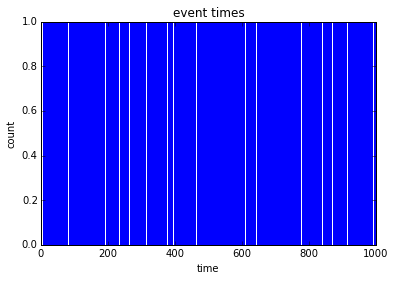

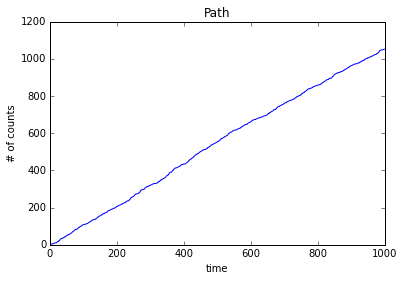

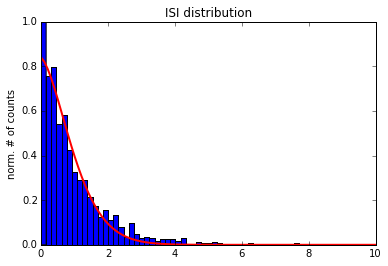

In [41]:
T = 1000
dt = 0.001
lam = 1

t = np.arange(0,T,dt)

p = npr.rand(len(t))

spike_train = t[p < lam*dt]

plt.figure()
for t_spike in spike_train:
    plt.axvline(t_spike) # plot spike times as vertical lines
plt.title('event times')
plt.xlabel('time')
plt.ylabel('count')
    
N = np.arange(1,len(spike_train)+1,1) # generate vector containing number of spikes

plt.figure()
plt.plot(spike_train,N) # plot number of spikes after given time
plt.title('Path')
plt.xlabel('time')
plt.ylabel('# of counts')

data = np.diff(spike_train)

plt.figure()
plt.title('ISI distribution')
plt.ylabel('norm. # of counts')
# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(data, bins=50, normed=True)
# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, np.around(bin_middles), entries)
# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0,10, 100)
plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)

The resulting path is given by a linear increase of the number of counts with time. This confirms the results that the expected number of counts is proportinal to $\lambda T$.

If the rate $\lambda$ gets to high, the approximation is violated and the result (compare fit parameters) are less accurate. If the time step $dt$ gets to large the assumptation that at most one spike will fall into each bin fails.